In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/futagoya/8-Predict-Heart-Disease-Machine-Learning/main/heart.csv'
df = pd.read_csv(url)

# Machine Learning Project: 2-Predict-Heart-Disease

## Dataset on: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 1. Check the Dataset's information and the null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2. Check and drop duplicated value

In [6]:
duplicate_data = df.duplicated().any()
duplicate_data

True

In [7]:
df = df.drop_duplicates()

In [8]:
duplicate_data = df.duplicated().any()
duplicate_data

False

# 3. Data Processing

In [9]:
cat_col = []
num_col = []

for column in df.columns:
    if df[column].nunique() <= 5:
        cat_col.append(column)
    else:
        num_col.append(column)

In [10]:
cat_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
num_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 4. Encoding the Categorical Columns

#### To prevent dummy variable trap, we need to drop first column of Cat_Col which has more than 2 values

#### 'Sex' and 'Target' are not included

In [12]:
cat_col.remove('sex')
cat_col.remove('target')
df=pd.get_dummies(df,columns=cat_col,drop_first=True)

In [13]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 5. Scale the Num_col (Feature Scaling)

We need to scale the numerical columns to get the better analysis of machine learning because this dataset is distance based values

If we do not use Feature Scaling, then the higher numbers will dominate the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st = StandardScaler()
df[num_col] = st.fit_transform(df[num_col])

In [16]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 6. Split the data into training & test set

### 1. Split the data

### 2. Train the models on training set

### 3. Test the models on testing set

In [17]:
X = df.drop(['target'],axis=1)
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

# 7. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [40]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred1 = log.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
res_1 = accuracy_score(y_test, y_pred1)
res_1

0.819672131147541

# 8. SVM

In [45]:
from sklearn import svm

In [46]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [47]:
y_pred2 = svm.predict(X_test)
res_2 = accuracy_score(y_test, y_pred2)
res_2

0.7704918032786885

# 9. KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred3 = knn.predict(X_test)

In [52]:
y_pred3 = knn.predict(X_test)
res_3 = accuracy_score(y_test, y_pred3)
res_3

0.819672131147541

In [53]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [55]:
score

[0.819672131147541,
 0.7213114754098361,
 0.819672131147541,
 0.7868852459016393,
 0.819672131147541,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902]

In [54]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
res_3 = accuracy_score(y_test, y_pred3)
res_3

0.8032786885245902

# Non-Linear ML Algorithms (No-need to pre-process Data)

In [56]:
url = 'https://raw.githubusercontent.com/futagoya/8-Predict-Heart-Disease-Machine-Learning/main/heart.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
df = df.drop_duplicates()

In [58]:
X = df.drop(['target'],axis=1)
y = df['target']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

# 10. Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()

In [62]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred4 = dtc.predict(X_test)
res_4 = accuracy_score(y_test, y_pred4)
res_4

0.7377049180327869

# 11. Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier()

In [67]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred5 = rfc.predict(X_test)
res_5 = accuracy_score(y_test, y_pred5)
res_5

0.8360655737704918

# 12. Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc = GradientBoostingClassifier()

In [71]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
y_pred6 = gbc.predict(X_test)
res_6 = accuracy_score(y_test, y_pred6)
res_6

0.7377049180327869

In [73]:
final_data = pd.DataFrame({'Models':['LogisticRegression','SVM','KNeighbors','DecisionTree','RFC','GBR'],'Accuracy':
                           [res_1,res_2,res_3,res_4,res_5,res_6]})
final_data

,Models,Accuracy
0,LogisticRegression,0.819672
1,SVM,0.770492
2,KNeighbors,0.803279
3,DecisionTree,0.737705
4,RFC,0.836066
5,GBR,0.737705


In [74]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

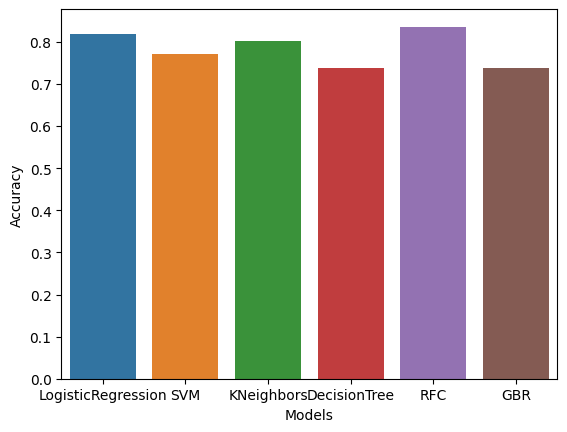

In [75]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

# 13. Choosing the Random Forrest Classifier

In [76]:
url = 'https://raw.githubusercontent.com/futagoya/8-Predict-Heart-Disease-Machine-Learning/main/heart.csv'
df = pd.read_csv(url)
df = df.drop_duplicates()
X=df.drop('target',axis=1)
y=df['target']

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [78]:
import joblib

In [79]:
joblib.dump(rfc,'heart_disease_analysis_rfc')

['heart_disease_analysis_rfc']

In [80]:
model = joblib.load('heart_disease_analysis_rfc')

# 13. Using GUI

In [81]:
from tkinter import *
import joblib

In [85]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('heart_disease_analysis_rfc')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="Less Chance of Heart Disease").grid(row=20)
    else:
        Label(master, text="More Chance of Heart Disease").grid(row=20)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()